<p><center><h1><b><u>Featurization and Model Tuning Project<u></b></h1></center></p>

<u><h3><b>Data Description:</b></h3></u>
<p>
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).
</p>

<u><h3><b>Domain:</b></h3></u>
<p>Cement manufacturing</p>

<p><h3><u><b>Context:</b></u></h3></p>
<p>
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
</p>
<u><h3><b>Attribute Information:</b></h3></u>
<ul>
  <li>Cement: measured in kg in a m3 mixture</li>
  <li>Blast: measured in kg in a m3 mixture</li>
  <li>Fly ash: measured in kg in a m3 mixture</li>
  <li>Water: measured in kg in a m3 mixture</li>
  <li>Superplasticizer: measured in kg in a m3 mixture</li>
  <li>Coarse Aggregate: measured in kg in a m3 mixture</li>
  <li>Fine Aggregate: measured in kg in a m3 mixture</li>
  <li>Age: day (1~365)</li>
  <li>Concrete compressive strength measured in MPa</li>
</ul>

<h3><b>Importing necessary librarys</b></h3>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, cross_validate, cross_val_predict
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats as sts
import statistics as stat
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
dataset_path = "/content/drive/My Drive/GreatLearning/FMST/FMST_Project/concrete.csv"
dataset = pd.read_csv(dataset_path)
dataset.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  strength
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28     29.89
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14     23.51
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28     29.22
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28     45.85
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28     18.29

In [ ]:
dataset.shape

(1030, 9)

In [ ]:
dataset.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<b><h4>Checking for Null values</h4></b>

In [ ]:
ds_null = pd.DataFrame(dataset.columns, columns=['Columns'])
ds_null["Is Null"] = list(dataset.isnull().any())
ds_null["Null Count"] = list(dataset.isnull().sum())
ds_null

Columns  Is Null  Null Count
0        cement    False           0
1          slag    False           0
2           ash    False           0
3         water    False           0
4  superplastic    False           0
5     coarseagg    False           0
6       fineagg    False           0
7           age    False           0
8      strength    False           0

<p>We can see that there are no any missing values in the dataset</p>

<b><h4>5 Point summary of all the column of the dataset</h4></b>

In [ ]:
fivePs = dataset.describe().T
fivePs

count        mean         std  ...      50%       75%     max
cement        1030.0  281.167864  104.506364  ...  272.900   350.000   540.0
slag          1030.0   73.895825   86.279342  ...   22.000   142.950   359.4
ash           1030.0   54.188350   63.997004  ...    0.000   118.300   200.1
water         1030.0  181.567282   21.354219  ...  185.000   192.000   247.0
superplastic  1030.0    6.204660    5.973841  ...    6.400    10.200    32.2
coarseagg     1030.0  972.918932   77.753954  ...  968.000  1029.400  1145.0
fineagg       1030.0  773.580485   80.175980  ...  779.500   824.000   992.6
age           1030.0   45.662136   63.169912  ...   28.000    56.000   365.0
strength      1030.0   35.817961   16.705742  ...   34.445    46.135    82.6

[9 rows x 8 columns]

<u><b><h3>Univariate data analysis</h3></b></u>

In [ ]:
skewness_df = pd.DataFrame(dataset.columns, columns=['Columns'])
skewness_df["Skewness"] = list(dataset.skew())
skewness_df

Columns  Skewness
0        cement  0.509481
1          slag  0.800717
2           ash  0.537354
3         water  0.074628
4  superplastic  0.907203
5     coarseagg -0.040220
6       fineagg -0.253010
7           age  3.269177
8      strength  0.416977

<h3><b><u>Observation:</u></b><h3>
<ul>
  <li><b>coarseagg</b> has negative skewness</li>
  <li><b>fineagg</b> has negative skewness</li>
  <li><b>age</b> has very hi skewness</li>
</ul>

In [ ]:
cols = list(dataset.columns)

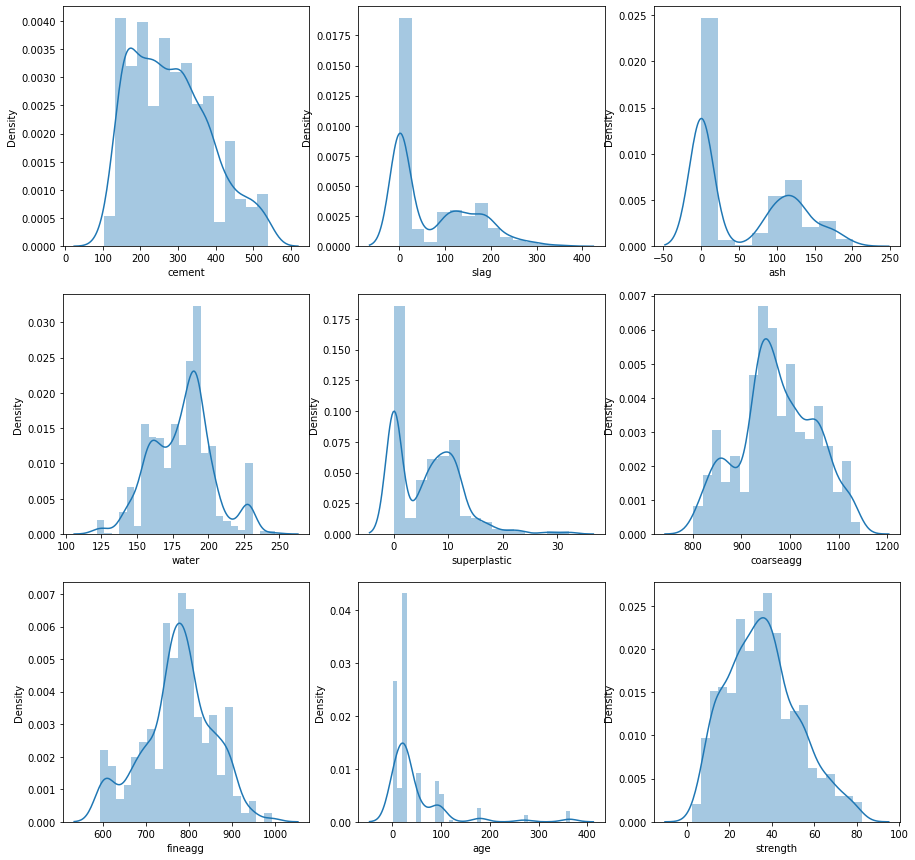

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(15, 15))
sns.distplot(dataset[cols[0]], ax=axs[0][0])
sns.distplot(dataset[cols[1]], ax=axs[0][1])
sns.distplot(dataset[cols[2]], ax=axs[0][2])
sns.distplot(dataset[cols[3]], ax=axs[1][0])
sns.distplot(dataset[cols[4]], ax=axs[1][1])
sns.distplot(dataset[cols[5]], ax=axs[1][2])
sns.distplot(dataset[cols[6]], ax=axs[2][0])
sns.distplot(dataset[cols[7]], ax=axs[2][1])
sns.distplot(dataset[cols[8]], ax=axs[2][2])

<b><u><h4>Observations:</h4></u></b>
<ul>
  <li><b>strength</b> appears to be more like normal disturbution</li>
  <li><b>superplastic</b> has few outliers on right side</li>
  <li><b>slag</b> & <b>ash</b> appears to have similar disturbution</li>
</ul>

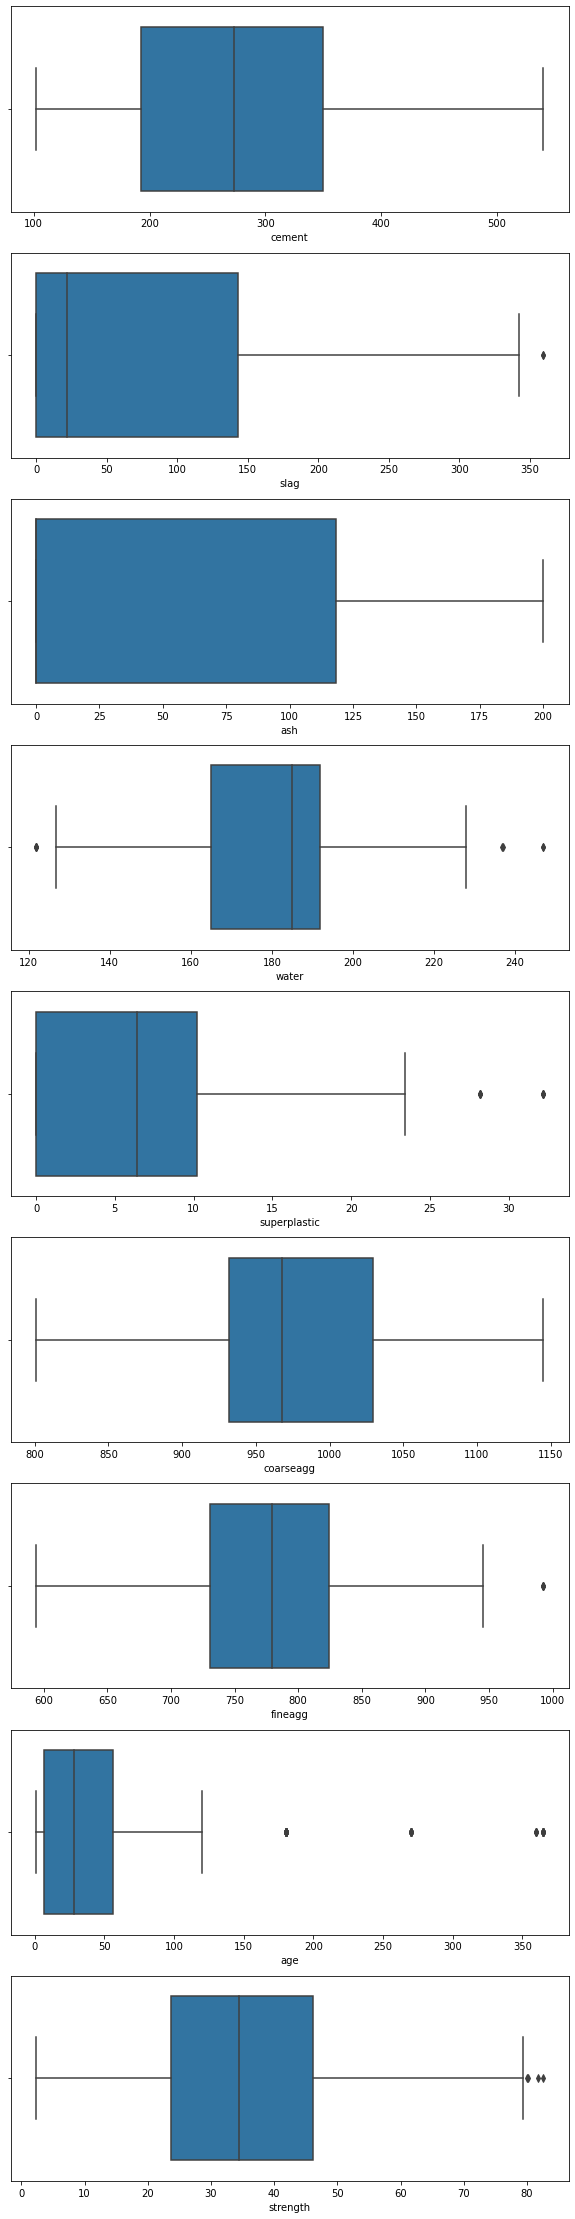

In [ ]:
fig1, axs1 = plt.subplots(9,1, figsize=(10, 40))
sns.boxplot(dataset[cols[0]],ax=axs1[0])
sns.boxplot(dataset[cols[1]],ax=axs1[1])
sns.boxplot(dataset[cols[2]],ax=axs1[2])
sns.boxplot(dataset[cols[3]],ax=axs1[3])
sns.boxplot(dataset[cols[4]],ax=axs1[4])
sns.boxplot(dataset[cols[5]],ax=axs1[5])
sns.boxplot(dataset[cols[6]],ax=axs1[6])
sns.boxplot(dataset[cols[7]],ax=axs1[7])
sns.boxplot(dataset[cols[8]],ax=axs1[8])

<b><u><h3>Observation:</h3></u></b>
<ul>
  <li>Outliers are present on both end for <b>water</b></li>
  <li>Few out liers present in Outliers are present on both end for 
  <b>slag</b>,
  <b>superplastics</b>,
  <b>fineagg</b>,
  <b>age</b>,
  <b>strength</b>
  </li>
</ul>

<b>Finding outliers from the record by colums IQR method</b>

In [ ]:
def findOutliers(column):
  q1 =  dataset[column].quantile(q=0.25)
  q3 = dataset[column].quantile(q=0.75)
  iqr = q3 - q1
  upper_thrushold = q3 + (1.5 * iqr)
  lower_thrushold = q1 - (1.5 * iqr)
  qoutliers = dataset[(dataset[column] < lower_thrushold) | (dataset[column] > upper_thrushold)][column]
  qoutliers_df = pd.DataFrame(list(qoutliers), columns=['Outliers'])
  return qoutliers_df

In [ ]:
print("Finding Outliers in: {}".format(cols[0]))
c1 = findOutliers(cols[0]).sort_values(by='Outliers',ascending=True).T
c1

Finding Outliers in: cement


Empty DataFrame
Columns: []
Index: [Outliers]

In [ ]:
print("We can see there are {} Outliers in {}".format(c1.shape[1],cols[0]))

We can see there are 0 Outliers in cement


In [ ]:
print("Finding Outliers in: {}".format(cols[1]))
c2 = findOutliers(cols[1]).sort_values(by='Outliers',ascending=True).T
c2

Finding Outliers in: slag


0      1
Outliers  359.4  359.4

In [ ]:
print("We can see there are {} Outliers in {}".format(c2.shape[1],cols[1]))

We can see there are 2 Outliers in slag


In [ ]:
print("Finding Outliers in: {}".format(cols[2]))
c3 = findOutliers(cols[2]).sort_values(by='Outliers',ascending=True).T
c3

Finding Outliers in: ash


Empty DataFrame
Columns: []
Index: [Outliers]

In [ ]:
print("We can see there are {} Outliers in {}".format(c3.shape[1],cols[2]))

We can see there are 0 Outliers in ash


In [ ]:
print("Finding Outliers in: {}".format(cols[3]))
c4 = findOutliers(cols[3]).sort_values(by='Outliers',ascending=True).T
c4

Finding Outliers in: water


2      3      4      6      8      7      5      1      0
Outliers  121.8  121.8  121.8  121.8  121.8  236.7  237.0  246.9  247.0

In [ ]:
print("We can see there are {} Outliers in {}".format(c4.shape[1],cols[3]))

We can see there are 9 Outliers in water


In [ ]:
print("Finding Outliers in: {}".format(cols[4]))
c5 = findOutliers(cols[4]).sort_values(by='Outliers',ascending=True).T
c5

Finding Outliers in: superplastic


0     1     4     7     9     2     3     5     6     8
Outliers  28.2  28.2  28.2  28.2  28.2  32.2  32.2  32.2  32.2  32.2

In [ ]:
print("We can see there are {} Outliers in {}".format(c5.shape[1],cols[4]))

We can see there are 10 Outliers in superplastic


In [ ]:
print("Finding Outliers in: {}".format(cols[5]))
c6 = findOutliers(cols[5]).sort_values(by='Outliers',ascending=True).T
c6

Finding Outliers in: coarseagg


Empty DataFrame
Columns: []
Index: [Outliers]

In [ ]:
print("We can see there are {} Outliers in {}".format(c6.shape[1],cols[5]))

We can see there are 0 Outliers in coarseagg


In [ ]:
print("Finding Outliers in: {}".format(cols[6]))
c7 = findOutliers(cols[6]).sort_values(by='Outliers',ascending=True).T 
c7

Finding Outliers in: fineagg


0      1      2      3      4
Outliers  992.6  992.6  992.6  992.6  992.6

In [ ]:
print("We can see there are {} Outliers in {}".format(c7.shape[1],cols[6]))

We can see there are 5 Outliers in fineagg


In [ ]:
print("Finding Outliers in: {}".format(cols[7]))
c8 = findOutliers(cols[7]).sort_values(by='Outliers',ascending=True).T
c8

Finding Outliers in: age


0    22   24   57   31   32   34  ...   41   40   27   28   11   33   25
Outliers  180  180  180  180  180  180  180  ...  365  365  365  365  365  365  365

[1 rows x 59 columns]

In [ ]:
print("We can see there are {} Outliers in {}".format(c8.shape[1],cols[7]))

We can see there are 59 Outliers in age


In [ ]:
print("Finding Outliers in: {}".format(cols[8]))
c9 = findOutliers(cols[8]).sort_values(by='Outliers',ascending=True).T
c9

Finding Outliers in: strength


1     3      0     2
Outliers  79.99  80.2  81.75  82.6

In [ ]:
print("We can see there are {} Outliers in {}".format(c9.shape[1],cols[8]))

We can see there are 4 Outliers in strength


<b><u><h3>
  Bivariate data analysis
</h3></u></b>

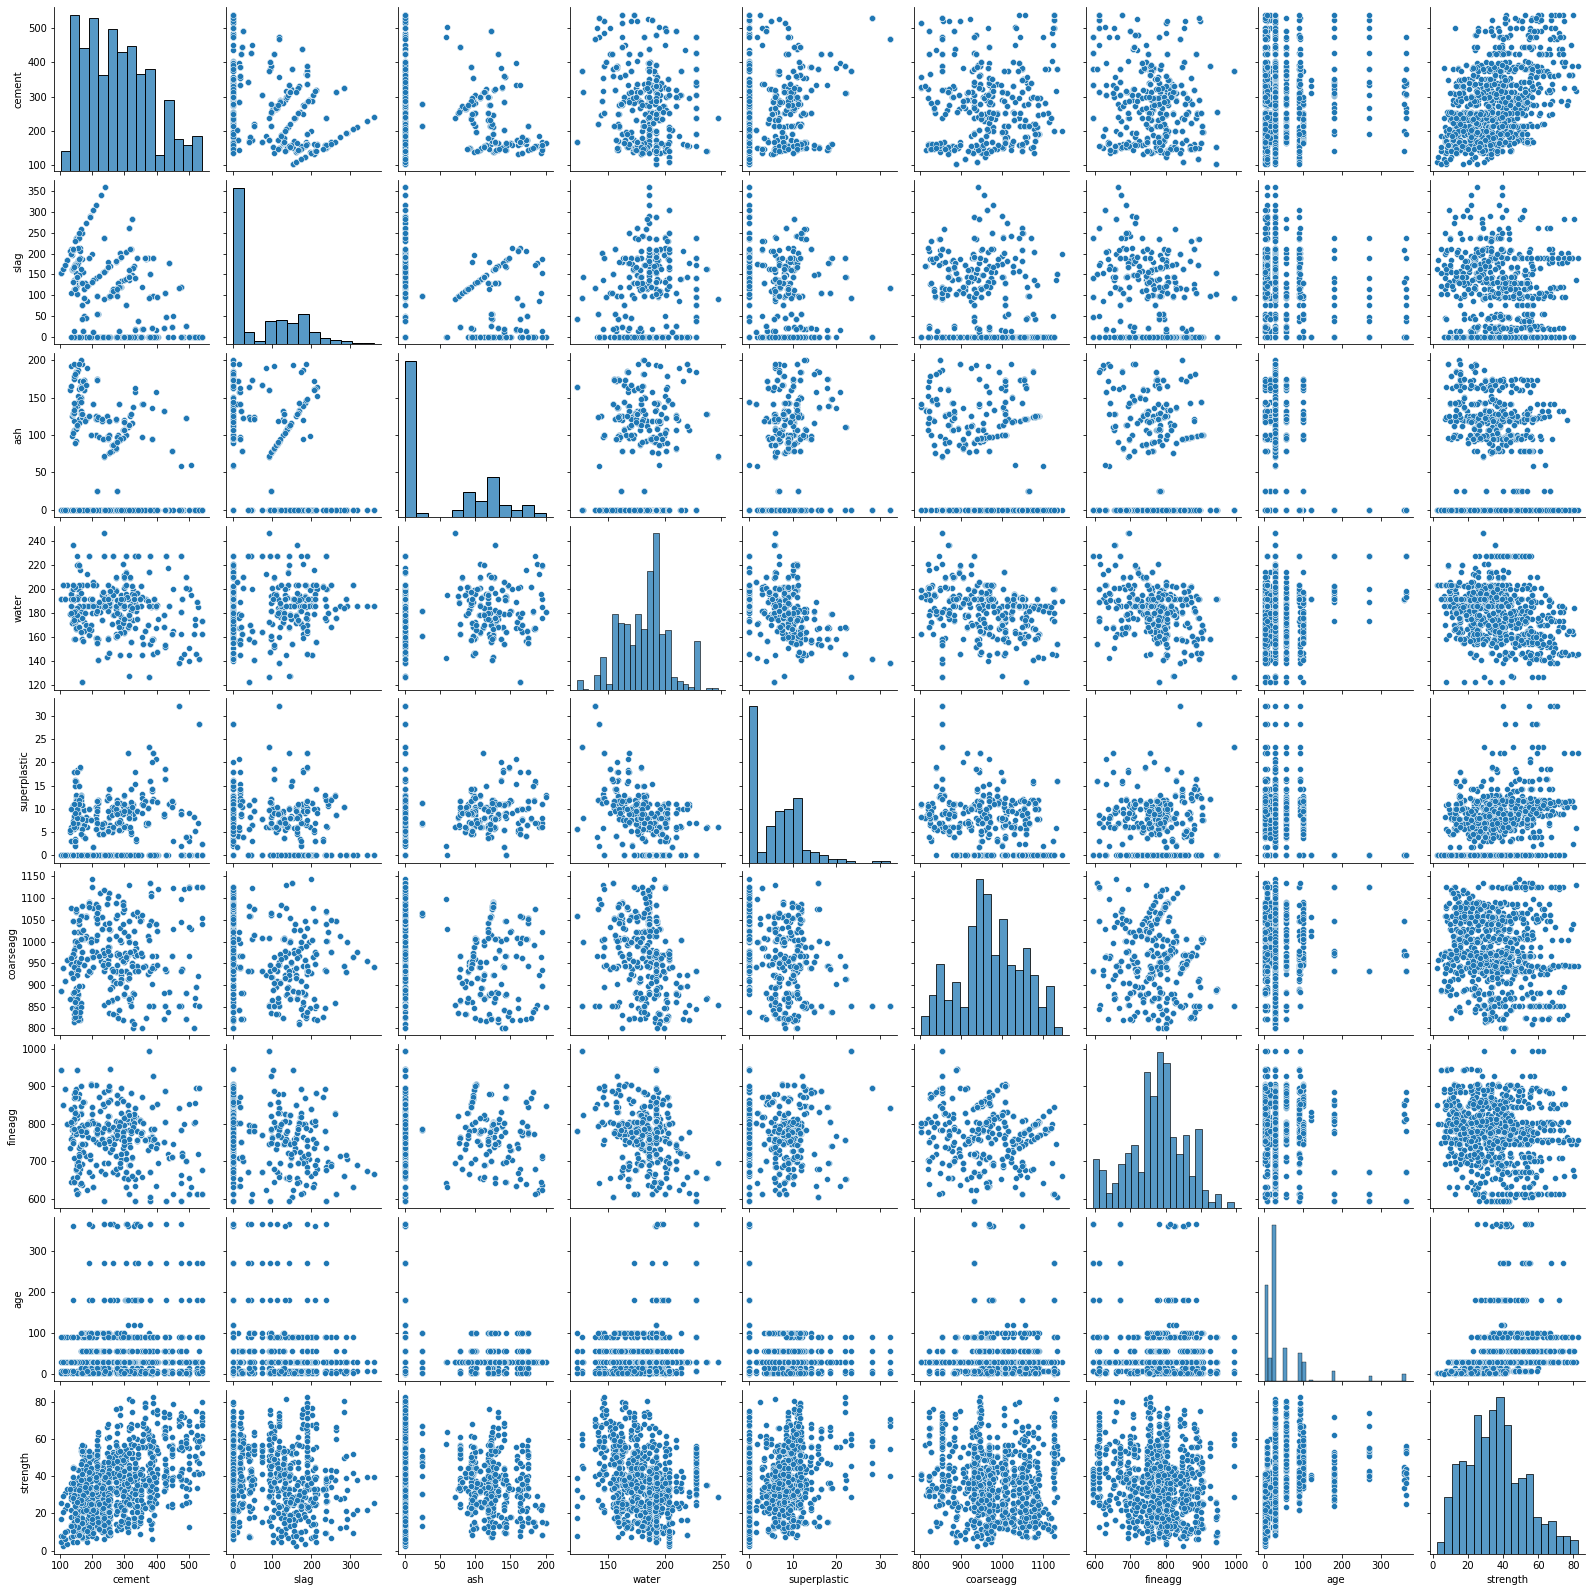

In [ ]:
sns.pairplot(dataset)

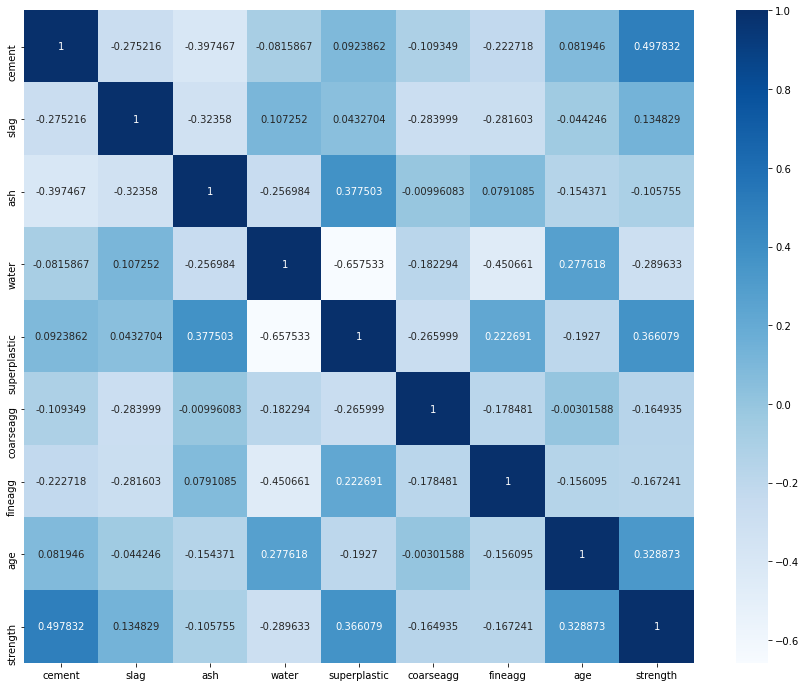

In [ ]:
corr = dataset.corr()
fig_corr, axs_corr = plt.subplots(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='g', ax=axs_corr)

<b><h4><u>
Observation from above Plot:
</u></h4></b>
<ul>
  <li><b>Cement</b> has positive <span style="color: #ff5722 !important">49.78%</span> corelation with target varible <b>Strength</b></li>
  <li><b>Superplastic</b> has positive <span style="color: #ff5722 !important">36.60%</span> corelation with target varible <b>Strength</b></li>

  <li><b>Age</b> has positive <span style="color: #ff5722 !important">32.88%</span> corelation with target varible <b>Strength</b></li>

  <li><b>Ash</b> has positive <span style="color: #ff5722 !important">37.75%</span> corelation with varible <b>Superplastic</b></li>

  <li><b>Superplastic</b> has positive <span style="color: #ff5722 !important">22.26%</span> corelation with varible <b>fineagg</b></li>

  <li><b>Water</b> has positive <span style="color: #ff5722 !important">27.76%</span> corelation with varible <b>Age</b></li>
</ul>

<p>
  This dataset has multicollinearity
</p>

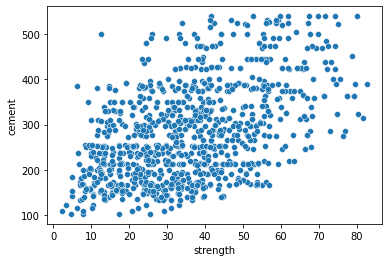

In [ ]:
sns.scatterplot(x=dataset.strength, y=dataset.cement)

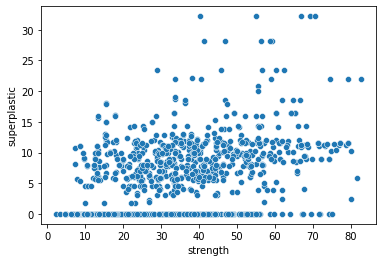

In [ ]:
sns.scatterplot(x=dataset.strength, y=dataset.superplastic)

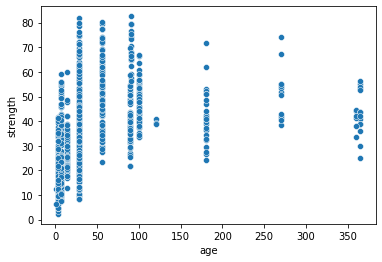

In [ ]:
sns.scatterplot(x=dataset.age, y=dataset.strength)

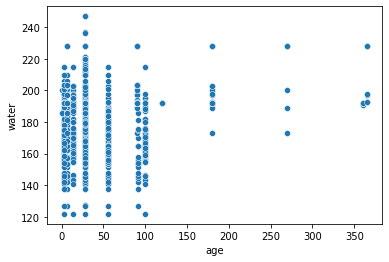

In [ ]:
sns.scatterplot(x=dataset.age, y=dataset.water)

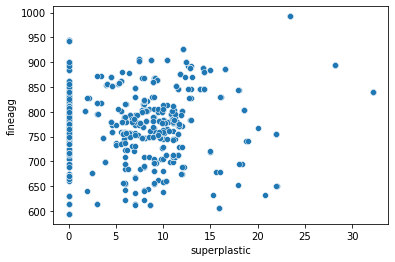

In [ ]:
sns.scatterplot(x=dataset.superplastic, y=dataset.fineagg)

<h4><b>Data Preprocessing and Model Building</b></h4>

<b>Checking for Gausian Mix</b>

In [ ]:
gmm1 = GaussianMixture(n_components=4)
gmm1.fit(dataset)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
pred = gmm1.predict(dataset)

In [ ]:
temp=dataset.copy()
frame = pd.DataFrame(temp)
frame.columns = temp.columns
frame['cluster'] = pred
frame.head()

cement   slag    ash  water  ...  fineagg  age  strength  cluster
0   141.3  212.0    0.0  203.5  ...    748.5   28     29.89        3
1   168.9   42.2  124.3  158.3  ...    796.2   14     23.51        2
2   250.0    0.0   95.7  187.4  ...    861.2   28     29.22        0
3   266.0  114.0    0.0  228.0  ...    670.0   28     45.85        3
4   154.8  183.4    0.0  193.3  ...    696.7   28     18.29        2

[5 rows x 10 columns]

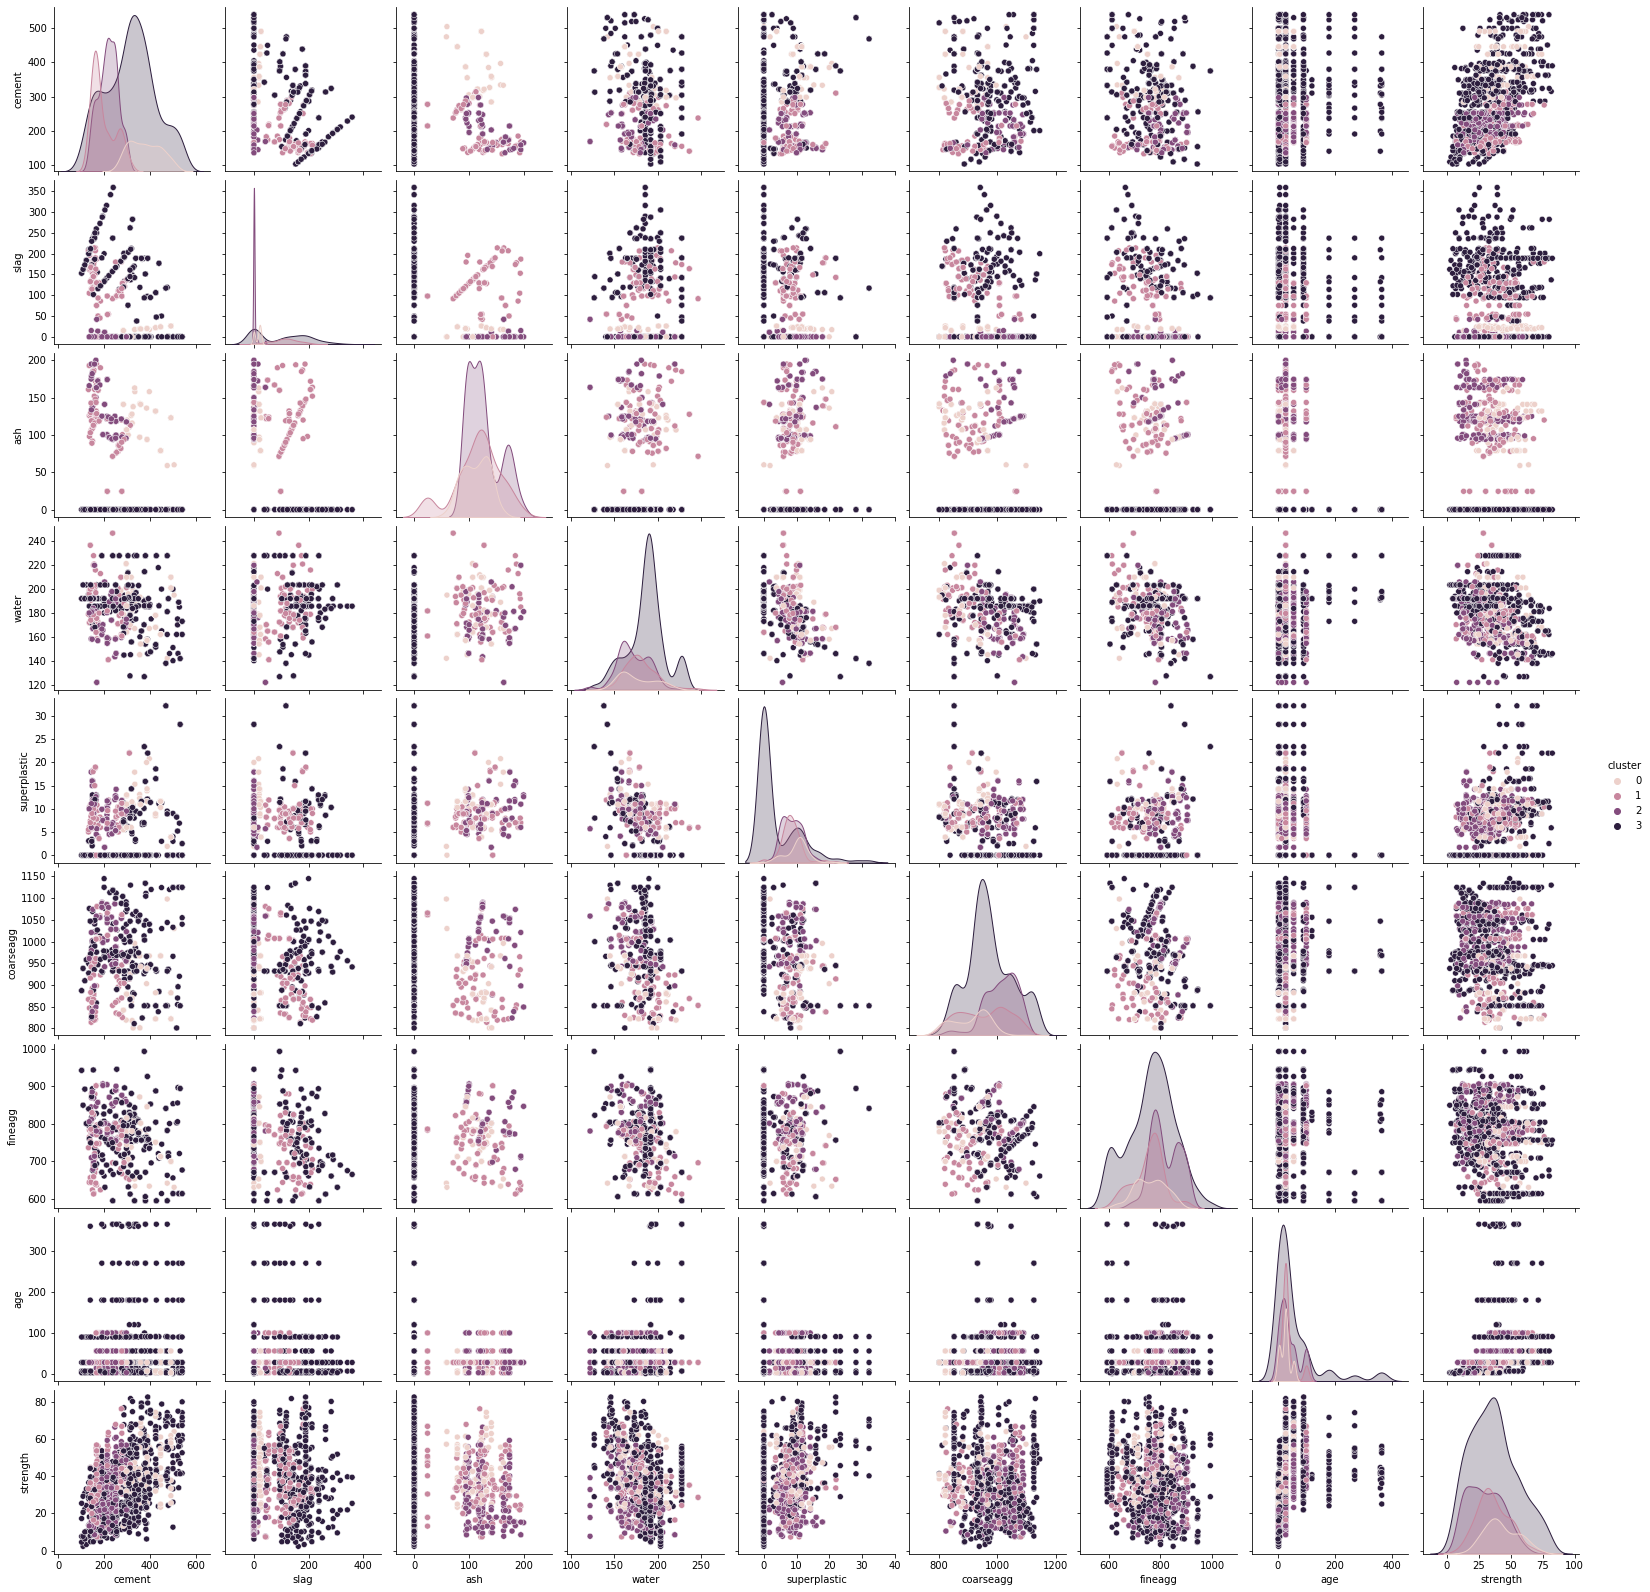

In [ ]:
sns.pairplot(frame, hue='cluster')

In [ ]:
conclusionDict = dict()

In [ ]:
conclusionDict["Model Name"] = []
conclusionDict["Train Accuracy"] = []
conclusionDict["Test Accuracy"] = []
conclusionDict["Conclusion"] = []

In [ ]:
features = dataset.iloc[ : , : -1]
targets = dataset.iloc[ : , -1: ]

In [ ]:
features.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28

In [ ]:
targets.head()

strength
0     29.89
1     23.51
2     29.22
3     45.85
4     18.29

In [ ]:
features.shape, targets.shape

((1030, 8), (1030, 1))

In [ ]:
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.25, random_state=42)

In [ ]:
features_train.shape, features_test.shape, targets_train.shape, targets_test.shape

((772, 8), (258, 8), (772, 1), (258, 1))

In [ ]:
rffi = RandomForestRegressor()
rffi.fit(features_train,targets_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
featuresImportanceDF = pd.DataFrame(rffi.feature_importances_, index=features_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
featuresImportanceDF['CummImportance'] = list(np.cumsum(featuresImportanceDF.Importance))
print("Computed Feature Importance Using Random Forest Regressor\n")
featuresImportanceDF

Computed Feature Importance Using Random Forest Regressor



Importance  CummImportance
age             0.336894        0.336894
cement          0.312069        0.648963
water           0.102515        0.751479
slag            0.081109        0.832588
superplastic    0.080762        0.913350
fineagg         0.045751        0.959101
coarseagg       0.023871        0.982972
ash             0.017028        1.000000

<b><h4><u>
  Observations:
</u></h4></b>
<ul>
  <li><b>age</b> has maximum importance</li>
  <li><b>cement</b> has 2<sup>nd</sup> highest importance</li>
  <li><b>age,cement, water, superplastic, slag, finagg</b> all to gether have importance of 0.954944 ie 95.4944% conturbution towards prediction</li>
</ul>

##### **Extracting of most important features out of all**

In [ ]:
most_important = featuresImportanceDF[featuresImportanceDF["CummImportance"] <= 0.96 ]
print("Most important features which contribute most in predection are:")
most_important

Most important features which contribute most in predection are:


Importance  CummImportance
age             0.336894        0.336894
cement          0.312069        0.648963
water           0.102515        0.751479
slag            0.081109        0.832588
superplastic    0.080762        0.913350
fineagg         0.045751        0.959101

In [ ]:
new_features_train = features_train.loc[:, most_important.index]
new_features_test =  features_test.loc[:, most_important.index]
new_features_train.shape, new_features_test.shape

((772, 6), (258, 6))

In [ ]:
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(new_features_train, targets_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
decisionTreeRegressorTrainScore = decisionTreeRegressor.score(new_features_train, targets_train)
print("Decision Tree Regressor Training Set Accuracy: {}".format(decisionTreeRegressorTrainScore))

Decision Tree Regressor Training Set Accuracy: 0.9953664725126086


In [ ]:
decisionTreeRegressorTestScore = decisionTreeRegressor.score(new_features_test, targets_test)
print("Decision Tree Regressor Training Set Accuracy: {}".format(decisionTreeRegressorTestScore))

Decision Tree Regressor Training Set Accuracy: 0.8813161928312585


Trying to find best barameters for decision tree without overfitting it by GridsearchCV

In [ ]:
parametersDT = {
              'splitter' : ['best', 'random'], 
              'ccp_alpha': [0.0, 0.1, 0.2, 0.5],
              'max_depth': [None, 2 , 5, 10],
              'criterion': ['mse', 'friedman_mse', 'mae'] ,
              'min_samples_split': [1,2,3,4],
              'min_samples_leaf': [1,2,3,4]
              }
dt_bp = DecisionTreeRegressor()
gridSearch_dtbp = GridSearchCV(dt_bp, parametersDT, verbose=150)

In [ ]:
gridSearch_dtbp.fit(new_features_train, targets_train)

Streaming output truncated to the last 5000 lines.
[CV] ccp_alpha=0.2, criterion=mae, max_depth=None, min_samples_leaf=2, min_samples_split=3, splitter=best 
[CV]  ccp_alpha=0.2, criterion=mae, max_depth=None, min_samples_leaf=2, min_samples_split=3, splitter=best, score=0.588, total=   0.0s
[CV] ccp_alpha=0.2, criterion=mae, max_depth=None, min_samples_leaf=2, min_samples_split=3, splitter=best 
[CV]  ccp_alpha=0.2, criterion=mae, max_depth=None, min_samples_leaf=2, min_samples_split=3, splitter=best, score=0.557, total=   0.0s
[CV] ccp_alpha=0.2, criterion=mae, max_depth=None, min_samples_leaf=2, min_samples_split=3, splitter=best 
[CV]  ccp_alpha=0.2, criterion=mae, max_depth=None, min_samples_leaf=2, min_samples_split=3, splitter=best, score=0.708, total=   0.0s
[CV] ccp_alpha=0.2, criterion=mae, max_depth=None, min_samples_leaf=2, min_samples_split=3, splitter=best 
[CV]  ccp_alpha=0.2, criterion=mae, max_depth=None, min_samples_leaf=2, min_samples_split=3, splitter=best, score=0.

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2, 0.5],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                      

Checking For Best parameters:

In [ ]:
gridSearch_dtbp.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [ ]:
# Best score for Decision Tree Regressor in 
gridSearch_dtbp.best_score_

0.8200030086057388

In [ ]:
best_decision_tree_regressor = gridSearch_dtbp.best_estimator_
best_decision_tree_regressor.score(new_features_train, targets_train)

0.9858576922970278

In [ ]:
best_decision_tree_regressor.score(new_features_test, targets_test)

0.7919521325540057

In [ ]:
conclusionDict['Model Name'].append("Decesion Tree Regressior")
conclusionDict['Train Accuracy'].append(best_decision_tree_regressor.score(new_features_train, targets_train))
conclusionDict['Test Accuracy'].append(best_decision_tree_regressor.score(new_features_test, targets_test))
conclusionDict['Conclusion'].append("Overfitted even after best parameter from GridSearchCV not suited for this problem")

<b>We can notice very hight difference between training and testing set accuracy in DecisionTreeRegressor is an overfit model and not suitable </b>

In [ ]:
randomForestRegressorDefault = RandomForestRegressor()
randomForestRegressorDefault.fit(new_features_train, targets_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
randomForestRegressorDefault.score(new_features_train, targets_train)

0.9838019421230524

In [ ]:
randomForestRegressorDefault.score(new_features_test, targets_test)

0.9082635980426241

In [ ]:
conclusionDict['Model Name'].append("Randomforest Regressior Default Params")
conclusionDict['Train Accuracy'].append(randomForestRegressorDefault.score(new_features_train, targets_train))
conclusionDict['Test Accuracy'].append(randomForestRegressorDefault.score(new_features_test, targets_test))
conclusionDict['Conclusion'].append("Even Random forest regressor overfitted for the problem with default parameters")

Finding Best parameter for ramdom forest using GridSearchCV

In [ ]:
parametersRF = {
              'ccp_alpha': [0.0, 0.1, 0.2, 0.5],
              'max_depth': [None, 2 , 5, 10],
              'criterion': ['mse', 'friedman_mse', 'mae'] ,
              'min_samples_leaf': [1,2,3,4],
              'n_estimators': [50, 70, 90, 100, 120, 150]
              }
rf_bp = RandomForestRegressor()
gridSearch_frbp = GridSearchCV(rf_bp, parametersRF, verbose=150)
gridSearch_frbp.fit(new_features_train, targets_train)

Streaming output truncated to the last 5000 lines.
[CV] ccp_alpha=0.2, criterion=mse, max_depth=10, min_samples_leaf=1, n_estimators=120 
[CV]  ccp_alpha=0.2, criterion=mse, max_depth=10, min_samples_leaf=1, n_estimators=120, score=0.900, total=   0.4s
[CV] ccp_alpha=0.2, criterion=mse, max_depth=10, min_samples_leaf=1, n_estimators=120 
[CV]  ccp_alpha=0.2, criterion=mse, max_depth=10, min_samples_leaf=1, n_estimators=120, score=0.832, total=   0.3s
[CV] ccp_alpha=0.2, criterion=mse, max_depth=10, min_samples_leaf=1, n_estimators=120 
[CV]  ccp_alpha=0.2, criterion=mse, max_depth=10, min_samples_leaf=1, n_estimators=120, score=0.918, total=   0.3s
[CV] ccp_alpha=0.2, criterion=mse, max_depth=10, min_samples_leaf=1, n_estimators=120 
[CV]  ccp_alpha=0.2, criterion=mse, max_depth=10, min_samples_leaf=1, n_estimators=120, score=0.851, total=   0.3s
[CV] ccp_alpha=0.2, criterion=mse, max_depth=10, min_samples_leaf=1, n_estimators=150 
[CV]  ccp_alpha=0.2, criterion=mse, max_depth=10, min_

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
best_randomforest_estimator = gridSearch_frbp.best_estimator_
best_randomforest_estimator.score(new_features_train, targets_train)

0.9835534054378633

In [ ]:
best_randomforest_estimator.score(new_features_test, targets_test)

0.9088481965091799

In [ ]:
conclusionDict['Model Name'].append("Randomforest Regressior With Best Parameter GridSerearch CV")
conclusionDict['Train Accuracy'].append(best_randomforest_estimator.score(new_features_train, targets_train))
conclusionDict['Test Accuracy'].append(best_randomforest_estimator.score(new_features_test, targets_test))
conclusionDict['Conclusion'].append("Even Random forest regressor With Best Parameter GridSerearch CV overfitted for the problem with default parameters")

In [ ]:
svmRegressorDefault = SVR()
svmRegressorDefault.fit(new_features_train, targets_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svmRegressorDefault.score(new_features_train, targets_train)

0.3554690250518871

In [ ]:
svmRegressorDefault.score(new_features_test, targets_test)

0.3267644395655953

In [ ]:
conclusionDict['Model Name'].append("SVR Default Parameters")
conclusionDict['Train Accuracy'].append(svmRegressorDefault.score(new_features_train, targets_train))
conclusionDict['Test Accuracy'].append(svmRegressorDefault.score(new_features_test, targets_test))
conclusionDict['Conclusion'].append("SVR is underfit model for this and not suitable.")

In [ ]:
conclusionDict

{'Conclusion': ['Overfitted even after best parameter from GridSearchCV not suited for this problem',
  'Even Random forest regressor overfitted for the problem with default parameters',
  'Even Random forest regressor With Best Parameter GridSerearch CV overfitted for the problem with default parameters',
  'SVR is underfit model for this and not suitable.'],
 'Model Name': ['Decesion Tree Regressior',
  'Randomforest Regressior Default Params',
  'Randomforest Regressior With Best Parameter GridSerearch CV',
  'SVR Default Parameters'],
 'Test Accuracy': [0.7919521325540057,
  0.9082635980426241,
  0.9088481965091799,
  0.3267644395655953],
 'Train Accuracy': [0.9858576922970278,
  0.9838019421230524,
  0.9835534054378633,
  0.3554690250518871]}

In [ ]:
parametersBSRF = {
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]
              }
svmRegressorBSBP = SVR()
gridSearch_svrbsbp = GridSearchCV(svmRegressorBSBP, parametersBSRF, verbose=150)
gridSearch_svrbsbp.fit(new_features_train, targets_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.453, total=   0.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.631, total=   1.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.525, total=   0.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.691, total=   0.6s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=150)

In [ ]:
gridSearch_svrbsbp.best_params_

{'C': 0.4, 'kernel': 'linear'}

In [ ]:
svr_best_bs = gridSearch_svrbsbp.best_estimator_
svr_best_bs.score(new_features_train, targets_train)

0.5678925043532936

In [ ]:
svr_best_bs.score(new_features_test, targets_test)

0.5364748736866923

Scaling Data For SVM

In [ ]:
scaler = StandardScaler()
new_features_train_scaled = scaler.fit_transform(new_features_train)
new_features_test_scaled = scaler.transform(new_features_test)

In [ ]:
svr_as = SVR(C=0.4, kernel='linear')
svr_as.fit(new_features_train_scaled, targets_train)

SVR(C=0.4, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_as.score(new_features_train_scaled, targets_train)

0.5875661122868077

In [ ]:
svr_as.score(new_features_test_scaled, targets_test)

0.5635899796285908

In [ ]:
conclusionDict['Model Name'].append("SVR Linear and 0.4 ")
conclusionDict['Train Accuracy'].append(svr_as.score(new_features_train_scaled, targets_train))
conclusionDict['Test Accuracy'].append(svr_as.score(new_features_test_scaled, targets_test))
conclusionDict['Conclusion'].append("SVR Linear is underfit model for this and not suitable.")

In [ ]:
svr_as_bp = SVR()
gridSearch_svrasbp = GridSearchCV(svr_as_bp, parametersBSRF, verbose=150)
gridSearch_svrasbp.fit(new_features_train_scaled, targets_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.510, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.596, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.508, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.675, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=150)

In [ ]:
gridSearch_svrasbp.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [ ]:
gridSearch_svrasbp.score(new_features_train_scaled, targets_train)

0.7061581083363913

In [ ]:
gridSearch_svrasbp.score(new_features_test_scaled, targets_test)

0.6789299892223257

In [ ]:
conclusionDict['Model Name'].append("SVR rbf and 1.0 ")
conclusionDict['Train Accuracy'].append(gridSearch_svrasbp.score(new_features_train_scaled, targets_train))
conclusionDict['Test Accuracy'].append(gridSearch_svrasbp.score(new_features_test_scaled, targets_test))
conclusionDict['Conclusion'].append("SVR Rbf and 1.0 after scaled data is around 67% accurate on test and 70% acurate on trainin set so not an overfit model")

In [ ]:
xgboostReg = xgb.XGBRegressor()
xgboostReg.fit(features_train, targets_train)

[08:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgboostReg.score(features_train, targets_train)

0.9440567022640627

In [ ]:
xgboostReg.score(features_test, targets_test)

0.8929184867357509

In [ ]:
conclusionDict['Model Name'].append("XGB Regreressor")
conclusionDict['Train Accuracy'].append(xgboostReg.score(features_train, targets_train))
conclusionDict['Test Accuracy'].append(xgboostReg.score(features_test, targets_test))
conclusionDict['Conclusion'].append("XGB Regreressor is around 89.29% accurate on test and 94.40% acurate on trainin set")

In [ ]:
parametersXGB = { 'base_score': [0.5, 0.6, 0.7],
                  'max_depth': [3,4,5,6],
                  'n_estimators': [50, 70, 90, 100, 120, 150]
                }
xgboostRegBP = xgb.XGBRegressor()
gridSearch_xgbbp = GridSearchCV(xgboostRegBP, parametersXGB, verbose=150)
gridSearch_xgbbp.fit(features_train, targets_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] base_score=0.5, max_depth=3, n_estimators=50 ....................
[08:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  base_score=0.5, max_depth=3, n_estimators=50, score=0.854, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] base_score=0.5, max_depth=3, n_estimators=50 ....................
[08:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  base_score=0.5, max_depth=3, n_estimators=50, score=0.904, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[CV] base_score=0.5, max_depth=3, n_estimators=50 ....................
[08:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'base_score': [0.5, 0.6, 0.7],
                         'max_depth': [3, 4, 5, 6],
                     

In [ ]:
gridSearch_xgbbp.best_params_

{'base_score': 0.7, 'max_depth': 4, 'n_estimators': 150}

In [ ]:
gridSearch_xgbbp.best_score_

0.9125461311098997

In [ ]:
gridSearch_xgbbp.score(features_train, targets_train)

0.9781457347432319

In [ ]:
gridSearch_xgbbp.score(features_test, targets_test)

0.9233874826415099

In [ ]:
conclusionDict['Model Name'].append("XGB Regreressor With Best Parameters From GridSearchCV")
conclusionDict['Train Accuracy'].append(gridSearch_xgbbp.score(features_train, targets_train))
conclusionDict['Test Accuracy'].append(gridSearch_xgbbp.score(features_test, targets_test))
conclusionDict['Conclusion'].append("XGB Regreressor With Best Parameters From GridSearchCV is around 92.33% accurate on test and 97.81% acurate on trainin set and not overfit and best suit for this problem")

#### **Model Summary Table**

In [ ]:
#pd.set_option('display.width', 100000)
summary_table = pd.DataFrame(conclusionDict)
summary_table.style.set_properties(subset=['Model Name', 'Conclusion'], **{'width': '50000px'})
# summary_table.style.set_properties(subset=['Conclusion'], **{'width': '1000px'})
summary_table

Model Name  Train Accuracy  Test Accuracy                                         Conclusion
0                           Decesion Tree Regressior        0.985858       0.791952  Overfitted even after best parameter from Grid...
1             Randomforest Regressior Default Params        0.983802       0.908264  Even Random forest regressor overfitted for th...
2  Randomforest Regressior With Best Parameter Gr...        0.983553       0.908848  Even Random forest regressor With Best Paramet...
3                             SVR Default Parameters        0.355469       0.326764   SVR is underfit model for this and not suitable.
4                                SVR Linear and 0.4         0.587566       0.563590  SVR Linear is underfit model for this and not ...
5                                   SVR rbf and 1.0         0.706158       0.678930  SVR Rbf and 1.0 after scaled data is around 67...
6                                    XGB Regreressor        0.944057       0.892918  XGB Regreressor is around 89.29% accurate on t...
7  XGB Regreressor With Best Parameters From Grid...        0.978146       0.923387  XGB Regreressor With Best Parameters From Grid...

**From the above table <u>Conclusion</u> is XGBoostRegressor with  base_score': 0.7, 'max_depth': 4, 'n_estimators': 150 parameter is the best suited model for this problem.**

**Computing XGBoostRegressor Model performance range at 95% confidence level**

In [ ]:
cv_res = gridSearch_xgbbp.cv_results_
cv_scores = cv_res["mean_test_score"]
cv_scores_df = pd.DataFrame(cv_scores, columns=["CV Scores"])
cv_scores_df.head()

CV Scores
0   0.866211
1   0.883517
2   0.891475
3   0.894339
4   0.898756

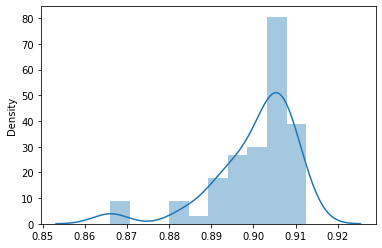

In [ ]:
sns.distplot(cv_scores)

In [ ]:
mean_cv_score = cv_scores_df.mean()
sd_cv_scores = cv_scores_df.std()

In [ ]:
upper_thrushold = mean_cv_score + (1.96 * sd_cv_scores)
lower_thrushold = mean_cv_score - (1.96 * sd_cv_scores)
list(upper_thrushold)[0], list(lower_thrushold)[0]

(0.9200033592070977, 0.8806097734889993)

**Conclusion:**
<p>Best XGBoostRegressor Model will have performance of  highest of 92% and least of 88.06% accuracy at 95% confidence level</p>